In [ ]:
!pip install nltk -q
!pip install gensim -q
!pip install wordcloud -q
!pip install emoji -q
!python -m spacy download pt_core_news_sm -q

     |████████████████████████████████| 175 kB 4.2 MB/s 
     |████████████████████████████████| 13.0 MB 7.9 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [ ]:
# IMPORTAÇÃO DAS BIBLIOTECAS
from nltk.corpus import stopwords
import seaborn as sns
import pandas as pd 
import numpy as np 
import string
import re
import nltk
import emoji
import spacy 
nltk.download('punkt')
nltk.download('stopwords')
pd.options.mode.chained_assignment = None  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# LEITURA DO DATAFRAME COM PANDAS
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tweets_coletados.csv', sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (16,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# FUNÇÕES PARA CONTAGEM DE TWEETS DE ACORDO COM USUÁRIO

# Função para filtrar a conta do usuário 
def filtra_users(text):
  aux = 0
  text_temp = str(text)
  text_temp = text_temp.split()
  for word in text_temp:
    aux = aux + 1
    if (word == "'screen_name':"):
      posicao = aux
  text_temp = text_temp[posicao]
  text_temp = re.sub(r"[',]", ' ', text_temp)
  return text_temp

# Função para agrupar todos os usuários em um único arquivo de texto
all_users = []
def agrupa_users(text):
  all_users.append(text)

# Função para contar todos os usuários em um único arquivo de texto
def conta_tweets_user(text): 
  text_temp = text.strip()
  str_all_users = ''.join(all_users)
  return str_all_users.count(text_temp)

In [ ]:
# REALIZANDO A CONTAGEM DE TWEETS POR USUÁRIO
# ATENÇÃO: A CELULA DEVE SER EXECUTADA UMA ÚNICA VEZ POR ACESSO

# Criação de um novo dataframe com os dados do usuário
df = data[['full_text','user']]

# Aplicando a função para filtrar o nome de usuário dos dados
df['conta'] = df['user'].apply(filtra_users)

# Entrada de dados para agrupamento de todos os usuários
df['conta'].apply(agrupa_users)

# Função para contagem dos usúarios no agrupamento
df['qnt_tweets'] = df['conta'].apply(conta_tweets_user)

df

,full_text,user,conta,qnt_tweets
0,Cupom de desconto e frete grátis no site da RI...,"{'id': 1387190661284352012, 'id_str': '1387190...",DaayFogaca,6
1,Atualização dos dados do Brasil. #coronavirus ...,"{'id': 1247531574674907136, 'id_str': '1247531...",dados_covid,691
2,Conferencia de prensa #COVID19 | 27 de abril d...,"{'id': 1532028901, 'id_str': '1532028901', 'na...",alcanzandohoy,4
3,"O Zero Um quer o lockdown da CPI, só da CPI.\n...","{'id': 3011101, 'id_str': '3011101', 'name': '...",marinhos,31
4,Conferencia de prensa #COVID19 | 27 de abril d...,"{'id': 1067218403914436608, 'id_str': '1067218...",GobiernoMX,4
...,...,...,...,...
33698,Sintomas podem atingir até 80% das pessoas. Pr...,"{'id': 292589488, 'id_str': '292589488', 'name...",portalhospbra,87
33699,Atualização #COVID19 #Brasil\n\nAtualização: 2...,"{'id': 1259950081895260160, 'id_str': '1259950...",covid19br_,228
33700,Atualização #COVID19 Mundo\n\nAtualização: 27/...,"{'id': 1259950081895260160, 'id_str': '1259950...",covid19br_,228
33701,Doses aplicadas até o momento:\n\n Criciúma: 4...,"{'id': 1068244018566451201, 'id_str': '1068244...",botdocovid,322


In [ ]:
# TRATAMENTO E VISUALIZAÇÃO DA QUANTIDADE DE TWEETS POR USUÁRIO

# Eliminando os dados duplicados 
new_df = df.drop_duplicates(subset=['conta'])

# Colocando os dados em ordem decrescente de acordom com a qtd de tweets
result_new_df = new_df[['conta','qnt_tweets']].sort_values(by=['qnt_tweets'], ascending=False)
result_new_df.reset_index(drop = True, inplace=True)

# Imprmindo os 10 primeiros resultados
#print(result_new_df.head(10))
#print(' ')

# Contando quantos usuários diferentes existem no dataframe
print('Existem '+str(result_new_df.conta.count())
      +' usuários no dataframe')

# Contando quantos usuários tem 1 tweet no dataframe
filtro_1 = result_new_df['qnt_tweets'] < 2
new_result_1 = result_new_df[filtro_1]
print(str(new_result_1.conta.count()) + ' usuários tem 1 tweet')

# Contando quantos usuários tem mais de 5 tweets no dataframe
filtro_5 = result_new_df['qnt_tweets'] >= 5 
new_result_5 = result_new_df[filtro_5]
print(str(new_result_5.conta.count()) + ' usuários tem 5 ou mais tweets')

# Contando quantos usuários tem mais de 10 tweets no dataframe
filtro_10 = result_new_df['qnt_tweets'] >= 10
new_result_10 = result_new_df[filtro_10]
print(str(new_result_10.conta.count()) + ' usuários tem 10 ou mais tweets')

result_new_df

Existem 9583 usuários no dataframe
6629 usuários tem 1 tweet
961 usuários tem 5 ou mais tweets
475 usuários tem 10 ou mais tweets


,conta,qnt_tweets
0,dados_covid,691
1,CovidBrazil,561
2,gabrielaitto,557
3,denio_vale,474
4,contagemcorona1,434
...,...,...
9578,cleberfp_,1
9579,matguitar,1
9580,EL3CTRIC_Boy19,1
9581,Mimoschella,1


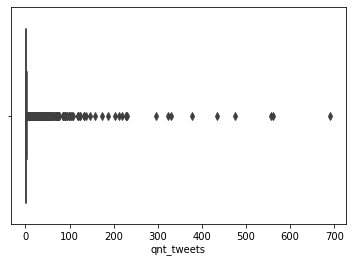

In [ ]:
# IPRIMINDO O BOXPLOT COM A QUANTIDADE DE TWEETS POR USUÁRIO
sns.boxplot(x=result_new_df["qnt_tweets"])

In [ ]:
# FUNÇÕES PARA FILTRAR OS TWEETS DE ACORDO COM O USUÁRIO DE NOTÍCIA

# Função para selecionar e classificar os tweets como notícias
def select_contas_news(text, lista):
  inicio = []
  fim = []
  text_temp = str(text)
  text_temp = re.sub(r'["-,.:@?!&$]', ' ', text_temp)
  text_temp = text_temp.lower()
  text_temp = text_temp.split()
  inicio.append(text_temp)
  result = [word for word in text_temp if word.lower() not in lista]
  fim.append(result)
  if(np.array_equal(inicio,fim)==True):
    return text
  else:
    return 'codigo_tweet_news'

In [ ]:
# FILTRANDO OS TWEETS DE ACORDO COM O USUÁRIO
# FILTRAGEM MANUAL REALIZADA PELO DIANSLEY

# Adicionando os usuários que terão os tweets apagados
users_news = ['dados_covid','gobiernomx','denio_vale','contagemcorona1','geladog_','AsCapasDoBrasil','botdocovid','canalsmais','DanAlcaras','covid19br_','dishumor',
              'tvcultura','jornal_cultura','sulinformacao','agenciabrasil','portalgp1','OPASOMSBrasil','adbrasil','COVID19BrUpdate','sitetnonline','EmDiaES',
              'kleberkarpov','OficialJBr','ady_ferrer','LinhasdeElvas','odesgoverno','NewspapersBR','RubinhoDivi','ofuxico_oficial','jornalistavitor','ofelipeb',
              'plantaoenfoco','studio877','correiodeminas','RiodeNojeira','Fonte_TradeNews','fcperrucci','portalhospbra','CoronaReporter','BlogTurS','jnascim',
              'casacivilbr','Agenciachina','Luli250025','RadioagenciaEBC','HolofoteD','fiocruz','minsaude','agencialupa','HdaBahia','MSF_brasil','OdigitalPt',
              'BaiaRodrigues','_gabge','plano_sp','News_Rondonia','aprovinciadopa','istoe_dinheiro','cearanews7','eduardo_patriot','tvbrasilgov','thescoborges',
              'pminoticias','Covid19DailyDta','imirante','brasildefato','congressoemfoco','PortalSigaMais','BrasilEFE','luzeniltoncreto','emersonradio','detrandfoficial',
              'macaeprefeitura','sindmepa','verdademz','Jornal_Canyons','PlenoNews','secsaudedf','portal_viva','portalLr1','AlagoasReal','reporterbeto','DemocraciaMZ',
              'cavalcantimanso','AlencarBraga13','AgenciaBrasilia','UchoInfo','BrazilSFE','avozdobrasil','dtudo1poucocv','NacoesUnidas','DGABC','noticiasgoias1',
              'PrefCanoas','jornaltocantins','falandonews','PesquisaFapesp','RhalfVideos','prazapublica','diariodeitabira','renatarc24h','luzeniltonsouz1',
              'Grupodobemestar','ConassOficial','portaldavacina','tribunapr','portalVALENTlNA','GovSC','EuropaReal','socioambiental','flaviofachel','opaisonline',
              'Portal_T5','vatadojo','edemocracia','radio_aparecida','brasil_io','ONUNews','diariodovale','Jornaldaki','LuzeniltonSouza','asbeiras',
              'BrCovidBot_1','portaldoimpacto','VejaSP','jornalodia','teretotal','Senoticias','TaquaSP','ovagnerfreitas','NexoJornal','brasildefatopr','rialnunes',
              'danielguimaf','proindio','BenOlivDreamer','SES_RS','portal_scc10','PortalMultiplix','RadioNacionalBR','fonte_certa','VacinacaoCOVID','EsquerdaPST',
              'laplaga_COVID19','PontevedraViva','dj_surfista','governodoamapa','Visao_pt','SC_Covid','cusquices1','Nominuto','CretonSouza','cartamaior','Pref_Colatina',
              'mundo_china','giscard_','cidadepalmas','cmsantiagocacem','ProconMaranhao','radionajua','AfpChecamos','beatrizdiniz','painelcovid19','ExpressoPB',
              'granjanews','fiocruzbrasilia','modulodist12','TVguadiana','Icict_Fiocruz','anginadora','MegaraG_K','recordtvminas','areavip','portaldocerrado',
              'visaohospitalar','milenamarc','Tareco_G','atilalemos10','informeblu','assembleiamg','iG','thesciencepulse','atarde','setor_saude','portalbemminas',
              'CBNoficial','VEJARio','kavilharobson','SaudeMG','covid19_faperj','douglas_cosfag','PulmaoSA','TimboNet','eratostenes','MulheresEmFoco','carasbrasil',
              'Quicktake_PT','monitordoorient','vacyalvaro','marcelofarelo','mpdemt','PortalJogada10','sbtnews','portalcnm','sdnewscatalao','recordtv_intsp',
              'atendimento_sbn','evandrolima395','andre_biernath','actportugal','BarbosaHellio','PortalVvale','obsdacamara','der_terrorist','taiwan_no_br',
              'MPTMG','belojardimpe','NoticiasdoPARA','hubespecialista','MidiaInformal','outrasaude','MSF_Portugal','ItNews_MS','EmbaVEPortugal','cnnoticias',
              'RelativeBrain','covid19_cnpq','Francischini_','ManhaJornal','AliciaZamora_','noticias_hc','FofisLu','ONGCriola','aReferenciaNews','santosbancarios',
              'hcesarleite','portalclicks','assembleia_PR','agencia_fiocruz','brasil_ahf','PrefeituraSV','tribunajundiai','cjpneves','redewb','portaltrii',
              'Boleirosnet','evnrodr','TVJustica','JC_RS','_campanacity','Alexmoc']

# Passando a lista de usuários para minúscula
new_users_news = []
for word in users_news:
  word = word.lower()
  new_users_news.append(word)

# Aplicação da função para filtrar os contas de notícias
new_data = data[['full_text','user']]
new_data['user'] = new_data['user'].apply(select_contas_news, lista=new_users_news)

# Filtra os tweets que não são de noticías
filtro = new_data.user!='codigo_tweet_news'
result_data_news = new_data[filtro]

# Reset do indice do dataframe 
result_data_news.reset_index(drop = True, inplace=True)
result_data_news['user'] = result_data_news['user'].apply(filtra_users)

result_data_news

,full_text,user
0,Cupom de desconto e frete grátis no site da RI...,DaayFogaca
1,Conferencia de prensa #COVID19 | 27 de abril d...,alcanzandohoy
2,"O Zero Um quer o lockdown da CPI, só da CPI.\n...",marinhos
3,"CPI da Covid, nada mais é que a politização de...",Malcolm_Costa
4,Comovente - Uma mãe na casa dos 50 morre de #C...,kombidatuna
...,...,...
19168,"A culpa é do STF, diz Associação de Indústrias...",Marcelo57584368
19169,Clique no link e assista o nosso documentário ...,gavioesoficial
19170,Número de mortos no Brasil: 454 mil\n\nO que o...,bloomotion
19171,"Antes de falar de futebol, vamos relembrar que...",ConexaoGrenal


In [ ]:
# FUNÇÕES PARA FILTRAR OS TWEETS DE ACORDO COM OS USUÁRIOS BOTS

# Função para selecionar e classificar os tweets como notícias
def select_contas_bots(text, lista):
  inicio = []
  fim = []
  text_temp = str(text)
  text_temp = re.sub(r'["-,.:@?!&$]', ' ', text_temp)
  text_temp = text_temp.lower()
  text_temp = text_temp.split()
  inicio.append(text_temp)
  result = [word for word in text_temp if word.lower() not in lista]
  fim.append(result)
  if(np.array_equal(inicio,fim)==True):
    return text
  else:
    return 'codigo_tweet_bots'

def compara_listas(lista1, lista2):
    usuarios_noticias = []
    contador = 0
    for word1 in lista1:
      if word1 in lista2:
        contador = contador + 1
    print('Existe '+str(contador)+' correspondências entres as listas'+ 
    ' de usuários de nóticia e usuários bots')


In [ ]:
# FILTRANDO OS TWEETS DE ACORDO COM O USUÁRIO BOTS
# FILTRAGEM MANUAL REALIZADA PELO GEAN ATRAVÉS DO BOTOMETER

# Adicionando os usuários que terão os tweets apagados
users_bots = ['dados_covid','apocalipseurg','acriplas_','portalclicks','grudiario','prefcapivari','pdcmarica','blogpeleja',
              'scfernandopolis', 'pdcCampos','portal_phi','SupermercadosT2','pref_santarem', 'acreinf', 'acreinf',
              'portal_fi','zkmkenjirwocl4p', 'grito_socorro','vcsestao','COVID19BrUpdate','Covid19DailyDta','BrCovidBot_1','PortalMultiplix','visaohospitalar','aReferenciaNews','riomaframix',
              'pt_ine','PrefJacobina','jornalecarioca','prefeituraaraxa','terapiapolitica','dcbarralonga','sitevmnoticias', 
              'portalbr104','tabeliaotremem1','saudeepandemia', 'SpoonerNews','pdcitatiba','Conservantes1','alo_imoveis', 'thegrammargame', 
              'covid_diario','104MaisFM','reyralphgado1','CantaPrefeitura','secitece','Channel360o','noticiasgoias1','portaltrii',
              'sertaoinfoco','thegoodnewscv','tribunagsp','pdccruzeiro','appquinto','JornalExtra2',
              'cursoscpt','RibeiraIncorpor','canalbussola','sboftalmologia','educasaudepi','h24news_hn', 'placasdehumor',
              'botdocovid','covid19br_','falandonews','TaquaSP','SC_Covid','cmsantiagocacem','belojardimpe','hubespecialista',
              'ManhaJornal','MercadoNews_','j_renovacao','gutosilva1','camaradivi','canal57cl', 'pdcuniao','portalregistro',
              'portalunico', 'pdcjundiai','estacahiper','pdcparanavai','de_usp', 'pdccabofrio', 'rondoniaquinews','oficialpenedo',
              'FracttalBrasil', 'imojuris','prefeiturapmf','JornalArroba','DCivilRioDoce', 'prefeituraartur', 'Lupa1Brasil','patroets',
              'comunicolog_br', 'escolatcmsp','escolatcmsp','AMemNoticias','Godoy25525916', 'StockAlert8', 'IraraPrefeitura','SindojusCE',
              'ClubeMandala', 'cross_lince','EiFisio','dadosambientais','offnewsnoticias', 'sim_noticias', 'ipsantoamaro','mdr35483884',
              'HolofoteD','noticias_hc','editorialj','aaoficial1','nortedenoticias','oexpressoonline','camaracgms','aurivanlacerda',
              'politico_br', 'PorvenirMx','ElderMedicos','portalafricas','RevistaABruxa', 'jornaldaorla','larissa86558644','Anderso29359078']               

# Passando a lista de usuários para minúscula
new_users_bots = []
for word in users_bots:
  word = word.lower()
  new_users_bots.append(word)

# Comparando as correspondências entre as listas de notícias com bots
compara_listas(lista1=users_news, lista2=users_bots)

# Aplicação da função para filtrar os contas de notícias
result_data_news['user'] = result_data_news['user'].apply(select_contas_bots, lista=new_users_bots)

# Filtra os tweets que não são de noticías
filtro = result_data_news.user!='codigo_tweet_bots'
result_data_bots = result_data_news[filtro]

# Reset do indice do dataframe 
result_data_bots.reset_index(drop = True, inplace=True)

result_data_bots

Existe 21 correspondências entres as listas de usuários de nóticia e usuários bots


,full_text,user
0,Cupom de desconto e frete grátis no site da RI...,DaayFogaca
1,Conferencia de prensa #COVID19 | 27 de abril d...,alcanzandohoy
2,"O Zero Um quer o lockdown da CPI, só da CPI.\n...",marinhos
3,"CPI da Covid, nada mais é que a politização de...",Malcolm_Costa
4,Comovente - Uma mãe na casa dos 50 morre de #C...,kombidatuna
...,...,...
18876,"A culpa é do STF, diz Associação de Indústrias...",Marcelo57584368
18877,Clique no link e assista o nosso documentário ...,gavioesoficial
18878,Número de mortos no Brasil: 454 mil\n\nO que o...,bloomotion
18879,"Antes de falar de futebol, vamos relembrar que...",ConexaoGrenal


In [ ]:
# BOXPLOT DATAFRAME APÓS REALIZR A ELIMINAÇÃO DOS USUÁRIOS DE NOTÍCIAS E BOTS

# Função para contagem dos usúarios no agrupamento
df_boxplot = result_data_bots
df_boxplot['qnt_tweets'] = df_boxplot['user'].apply(conta_tweets_user)

# Eliminando os dados duplicados 
df_boxplot = df_boxplot.drop_duplicates(subset=['user'])

# Colocando os dados em ordem decrescente de acordom com a qtd de tweets
df_boxplot = df_boxplot[['user','qnt_tweets']].sort_values(by=['qnt_tweets'], ascending=False)
df_boxplot.reset_index(drop = True, inplace=True)

# IMPRIMINDO A TABELA COM OS USUÁRIOS APÓS A LIMPEZA
df_boxplot

,user,qnt_tweets
0,CovidBrazil,561
1,gabrielaitto,557
2,ivan_monsores,158
3,CLAUDIACALIEL,39
4,Play2Car_Zerokm,39
...,...,...
9163,ElianeMSousa,1
9164,Jennyfercomfome,1
9165,WagVava,1
9166,gervasiomaia,1


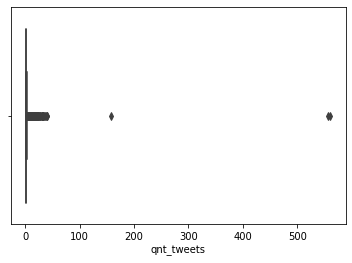

In [ ]:
# IPRIMINDO O BOXPLOT APÓS A LIMPEZA DE USUÁRIOS
sns.boxplot(x=df_boxplot["qnt_tweets"])

In [ ]:
# FUNÇÃO PARA CONVERSÃO DE EMOJIS EM STRINGS

# Função para converção de emojis em strings
def convert_emojis(text):
  text_temp = emoji.demojize(str(text), language='pt')
  return text_temp

In [ ]:
# CONVERTENDO OS EMOJIS EM STRINGS

# Aplicando a função de conversão de strings
result_data_bots = result_data_bots[['full_text', 'user']]
result_data_bots['full_text'] = result_data_bots['full_text'].apply(convert_emojis)

# Tratamento das string geradas na conversão dos emojis
result_data_bots['full_text'] = result_data_bots['full_text'].str.replace(':',' ')

result_data_bots

,full_text,user
0,Cupom de desconto e frete grátis no site da RI...,DaayFogaca
1,Conferencia de prensa #COVID19 | 27 de abril d...,alcanzandohoy
2,"O Zero Um quer o lockdown da CPI, só da CPI.\n...",marinhos
3,"CPI da Covid, nada mais é que a politização de...",Malcolm_Costa
4,Comovente - Uma mãe na casa dos 50 morre de #C...,kombidatuna
...,...,...
18876,"A culpa é do STF, diz Associação de Indústrias...",Marcelo57584368
18877,Clique no link e assista o nosso documentário ...,gavioesoficial
18878,Número de mortos no Brasil 454 mil\n\nO que o...,bloomotion
18879,"Antes de falar de futebol, vamos relembrar que...",ConexaoGrenal


In [ ]:
# FUNÇÃO PARA LIMPEZA DOS TWEETS 
def cleaning_text(text):
  punctuation_stand = string.punctuation # Pontuações
  punctuation_others = re.compile('<.*?>') # Pontos
  urls = re.compile(r'@[a-z0-9_]+|http\S+|www\.\S+') # Usuários e url's
  text_temp = text.lower()
  text_temp = punctuation_others.sub(r'', text_temp)
  text_temp = text_temp.translate(str.maketrans('', '', string.digits)) #removendo numeros
  text_temp = urls.sub(r'', text_temp)
  text_temp = text_temp.translate(str.maketrans('','',punctuation_stand))
  return text_temp

In [ ]:
# LIMPEZA DOS TWEETS

result_data_bots['full_text'] = result_data_bots['full_text'].apply(cleaning_text)

result_data_bots

,full_text,user
0,cupom de desconto e frete grátis no site da ri...,DaayFogaca
1,conferencia de prensa covid de abril de t...,alcanzandohoy
2,o zero um quer o lockdown da cpi só da cpi\n\n...,marinhos
3,cpi da covid nada mais é que a politização de ...,Malcolm_Costa
4,comovente uma mãe na casa dos morre de covid...,kombidatuna
...,...,...
18876,a culpa é do stf diz associação de indústrias ...,Marcelo57584368
18877,clique no link e assista o nosso documentário ...,gavioesoficial
18878,número de mortos no brasil mil\n\no que o bo...,bloomotion
18879,antes de falar de futebol vamos relembrar que ...,ConexaoGrenal


In [ ]:
# FUNÇÃO PARA FILTRAR OS TWEETS DE ACORDO COM DETERMINADA ENTRADA 

# Função para selecionar e classificar os tweets
def select_tweet_input(text, lista):
  inicio = []
  fim = []
  text_temp = str(text)
  text_temp = re.sub(r'["-,.:@?!&$]', ' ', text_temp)
  text_temp = text_temp.lower()
  text_temp = text_temp.split()
  inicio.append(text_temp)
  result = [word for word in text_temp if word.lower() not in lista]
  fim.append(result)
  if(np.array_equal(inicio,fim)==True):
    return ' '.join(result)
  else:
    return 'codigo_tweet_selected'

In [ ]:
# FILTRANDO OS TWEETS DE ACORDO COM PALAVRAS NO TEXTO
# Ex: Tweets que contenha a palavra BBB ou algum participante

# Adicionando as palavras que serão filtradas
words_input = ['bbb','forapocah', 'paulogustavo']

# Tranformando o result_data_bots em result_clean 
result_clean = result_data_bots

# Aplicando a função para seleção dos 
result_clean['full_text'] = result_clean['full_text'].apply(select_tweet_input, lista=words_input)

# Filtra os tweets que não foram selecionados
filtro = result_clean.full_text!='codigo_tweet_selected'
result_remove = result_clean[filtro]

# Reset do indice do dataframe 
result_remove.reset_index(drop = True, inplace=True)

result_remove

,full_text,user
0,conferencia de prensa covid de abril de tcohba...,alcanzandohoy
1,o zero um quer o lockdown da cpi só da cpi cpi...,marinhos
2,cpi da covid nada mais é que a politização de ...,Malcolm_Costa
3,comovente uma mãe na casa dos morre de covid d...,kombidatuna
4,mil mortos por covid só em abril e nem acabou ...,cipodearoeira
...,...,...
17910,a culpa é do stf diz associação de indústrias ...,Marcelo57584368
17911,clique no link e assista o nosso documentário ...,gavioesoficial
17912,número de mortos no brasil mil o que o bolsona...,bloomotion
17913,antes de falar de futebol vamos relembrar que ...,ConexaoGrenal


In [ ]:
# FUNÇÃO PARA REMOVER DETERMINADAS PALAVRAS DOS TWEETS
def remove_words(text,lista):
  text_temp = text.split()
  result = [word for word in text_temp if word.lower() not in lista]
  result_temp = ' '.join(result)
  return result_temp

In [ ]:
# REMOVENDO AS PALAVRAS DOS TWEETS
# Ex: As palavras que foram utilizadas na coleta

# Adicionando as palavras que serão removidas
words_remove  = [ 'covid', 'covid19', 'coronavírus', 'coronavirus','pandemia',
                 'brasil','covid19brasil','sobre','ainda','pra','vai','agora','aqui','hoje','todo',
                  'dia','co','q','de','o','e','da','mil','um','a','que','uma',
                 'dos', 'é','ela','na','em','tão','do','vc','todo','toda','só',
                 'nada','tudo','no','pouco','por','nem','se','nos','para','antes',
                 'faz','neste','quer','teve','depois','mas','há','mais','ano','diz',
                 'covidbrasil','pessoa','ter',]

# Aplicando a função para remoção das palavras no tweet
result_remove['full_text'] = result_remove['full_text'].apply(remove_words, lista=words_remove)

result_remove

,full_text,user
0,conferencia prensa abril tcohbaqqquz,alcanzandohoy
1,zero lockdown cpi cpi cpidacovid flaviobolsona...,marinhos
2,cpi politização assunto delicado serve instant...,Malcolm_Costa
3,comovente mãe casa morre oxigênio não ambulânc...,kombidatuna
4,mortos abril acabou mês tcoxlewfxemv,cipodearoeira
...,...,...
17910,culpa stf associação indústrias químicas senad...,Marcelo57584368
17911,clique link assista nosso documentário não bri...,gavioesoficial
17912,número mortos bolsonaro evitar brasileiros mor...,bloomotion
17913,falar futebol vamos relembrar estamos meio seg...,ConexaoGrenal


In [ ]:
# INICIANDO A CRIAÇÃO DA NUVEM DE PALAVRAS

# ----------------------------------------------------------------------------------------------

In [ ]:
def remove_stopwords(text):
  text_temp = str(text)
  stopwords = nltk.corpus.stopwords.words('portuguese') 
  newStopWords = ['sobre','ainda','pra','vai','agora','aqui','hoje','todo',
                  'dia','https','co','CO','covid','c o','de','mil','pessoa']
  stopwords.extend(newStopWords)
  new_text = [word for word in text_temp.split() if word not in stopwords]
  return ' '.join(new_text)

In [ ]:
# Calculando a frequência de cada palavra no dataframe com NLTK
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

new_data_remove = result_remove['full_text']
new_data_remove = new_data_remove.apply(remove_stopwords)

sent = ' '.join(new_data_remove)
frequencia = FreqDist(word.lower() for word in word_tokenize(sent))
df_frequencia = pd.DataFrame({"Palavras": frequencia.keys(),
                              "Frequencia": frequencia.values()})
df_frequencia.nlargest(columns = "Frequencia", n = 30)

,Palavras,Frequencia
178,vacina,2159
110,contra,1756
447,pessoas,1275
159,saúde,1200
48,mortes,1154
150,vacinação,1062
7,cpidacovid,1052
334,vacinas,872
76,bolsonaro,840
400,casos,810


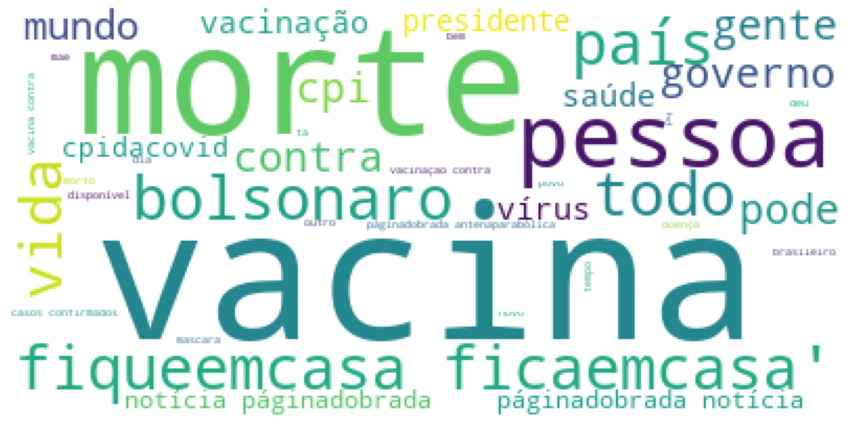

In [ ]:
# CRIAÇÃO DA PRIMEIRA NUVEM DE PALAVRAS

# Junção de todos os tweets em um único texto
texto = []
def criaTexto(text):
  text_temp = str(text)
  texto.append(text_temp)
  return texto

nuvem_palavras_1 = new_data_remove.apply(criaTexto)
new_texto = str(texto).strip('[]')

# Criação da nuvem de palavras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_words=40, background_color='white').generate(str(new_texto))
fig = plt.figure(1, figsize=(15, 15))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [ ]:
# FINALIZANDO A CRIAÇÃO DA NUVEM DE PALAVRAS

# ----------------------------------------------------------------------------------------------

In [ ]:
# FUNÇÕES PARA TOKENIZAR, ELIMINAR STOPWORDS E LEMANTIZAR

# Função para lemantizar as palavras
def lemmatization(text):
  nlp = spacy.load('pt')
  text_temp = str(text)
  doc = nlp(text_temp)
  words_lemma = [token.lemma_ for token in doc]
  return ' '.join(words_lemma)

# Função para tokenizar e eliminar stopwords
def tokenized_words(text):
  text_temp = str(text)
  stopwords = nltk.corpus.stopwords.words('portuguese') # Stopwords
  stopwords.extend(words_remove)
  tokens = [word for word in text_temp.split() if word not in stopwords]
  return tokens

In [ ]:
# TOKENIZAÇÃO E LEMATIZAÇÃO DOS TWEETS

# Lematização dos tweets
#result_remove['full_text'] = result_remove['full_text'].apply(lemmatization)
#result_remove.to_csv('dataframe_lematizado.csv')

# Tokenização dos tweets
tokens = result_remove['full_text'].apply(tokenized_words)

print(tokens)

0                [conferencia, prensa, abril, tcohbaqqquz]
1        [zero, lockdown, cpi, cpi, cpidacovid, flaviob...
2        [cpi, politização, assunto, delicado, serve, i...
3        [comovente, mãe, casa, morre, oxigênio, ambulâ...
4               [mortos, abril, acabou, mês, tcoxlewfxemv]
                               ...                        
17910    [culpa, stf, associação, indústrias, químicas,...
17911    [clique, link, assista, documentário, brincade...
17912    [número, mortos, bolsonaro, evitar, brasileiro...
17913    [falar, futebol, vamos, relembrar, meio, segun...
17914         [acabando, colombia, matando, tcokvhaxdvzdy]
Name: full_text, Length: 17915, dtype: object


In [ ]:
# Construção do dicionário e do corpo do modelo
from gensim import corpora, models

dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(text) for text in tokens]

In [ ]:
# Treinamento do modelo LDA
ldamodel = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=15)

In [ ]:
# -----------------------------------------------

# TESTANDO NÚMERO DE PASSES DO MODELO LDA

In [ ]:
# CRIANDO UM ARRAY PARA ARMAZENAR AS COERÊNCIAS DE CADA UMA DAS OCORRÊNCIAS

coerencia_passes = []

In [ ]:
# NUMERO DE PASSES = 1

ldamodel_passes = models.ldamodel.LdaModel(corpus=corpus, 
                                    id2word=dictionary,
                                    num_topics=5,
                                    random_state=100,
                                    update_every=1,
                                    chunksize=2000,
                                    passes=1,
                                    alpha="auto",
                                    per_word_topics=True)


from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

coherencemodel = CoherenceModel(model=ldamodel_passes, texts=tokens, dictionary=dictionary, coherence='c_v')
coherence_value = coherencemodel.get_coherence()
print("A coerência para passes=1 foi de: " + str(coherence_value))

coerencia_passes.append(coherence_value)
coerencia_passes

A coerência para passes=1 foi de: 0.2761442084517457


[0.2761442084517457]

In [ ]:
# FORMULA PARA CALCULAR A COERENCIA DE ACORDO COM O NUMERO DE TOPICOS
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary,corpus,texts,limit,start=1,step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.ldamodel.LdaModel(corpus=corpus, 
                                    id2word=dictionary,
                                    num_topics=num_topics,
                                    random_state=100,
                                    update_every=1,
                                    chunksize=2000,
                                    passes=8,
                                    alpha="auto",
                                    per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokens, limit=15)

In [ ]:
print(coherence_values)

[0.17790014207626534, 0.2634818019272653, 0.32149978429320747, 0.3679860774094642, 0.456699830749967, 0.3845419863562225, 0.44870381408008797, 0.44688578860453454, 0.447108184368745, 0.4658809969405405, 0.41465559900315957, 0.4205411050772287, 0.4561279706047439, 0.43797686921114887]


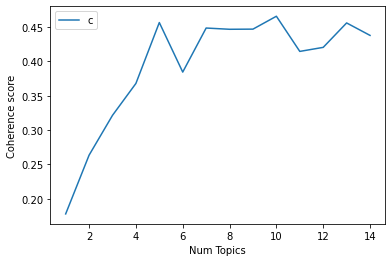

In [ ]:
# Show Coherence graph
limit=15; start=1; step=1;
x= range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()